# Case study on Supervised learning

Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Read the dataset to the python environment.

In [2]:
data=pd.read_excel('iris .xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Pre-processing

In [3]:
data.shape

(150, 5)

In [4]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
data[data.isnull().any(axis=1)]

,SL,SW,PL,PW,Classification
2,NaN,3.2,1.3,0.2,Iris-setosa
10,5.4,NaN,1.5,0.2,Iris-setosa
21,NaN,3.7,1.5,0.4,Iris-setosa
27,5.2,NaN,1.5,0.2,Iris-setosa
28,5.2,3.4,NaN,0.2,Iris-setosa
39,NaN,3.4,1.5,0.2,Iris-setosa
42,4.4,3.2,NaN,0.2,Iris-setosa
43,5.0,NaN,1.6,0.6,Iris-setosa
51,NaN,3.2,4.5,1.5,Iris-versicolor
56,6.3,3.3,NaN,1.6,Iris-versicolor


In [9]:
#filling missing values

In [10]:
#missing values can be filled with median for each class
missing=data.groupby('Classification')['SL','SW','PL'].median()
for i in ['Iris-setosa','Iris-versicolor','Iris-virginica']:
    for j in['SL','SW','PL']:
        data.loc[data['Classification']==i,j]=data[data['Classification']==i][j].fillna(missing.loc[i,j])

In [11]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [12]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

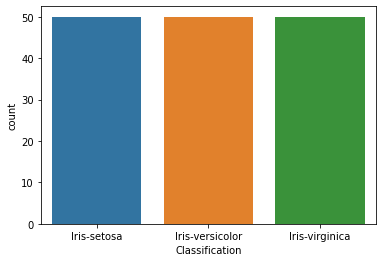

In [13]:
sns.countplot(x='Classification', data=data )
plt.show()

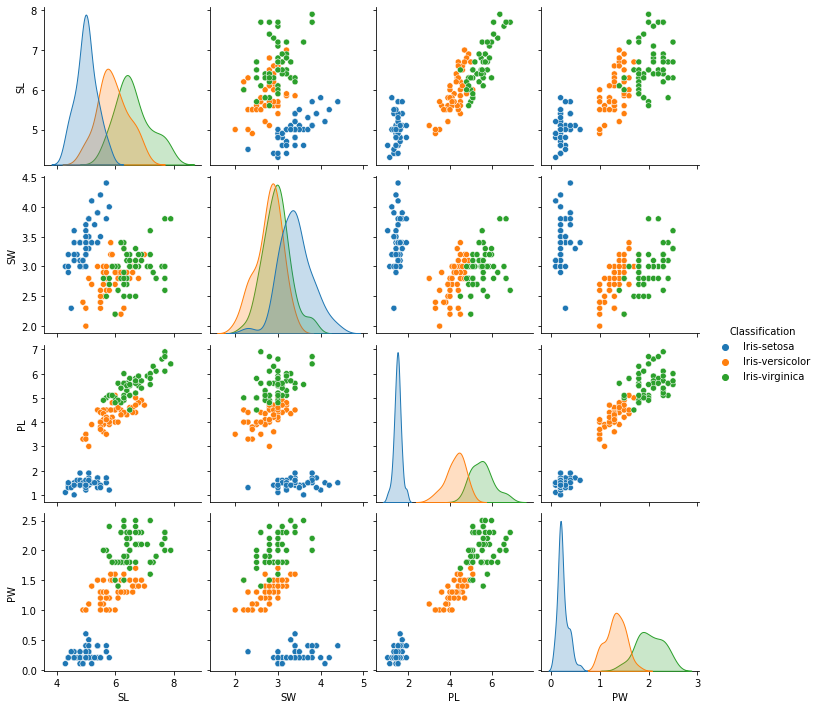

In [14]:
sns.pairplot(data,hue="Classification")

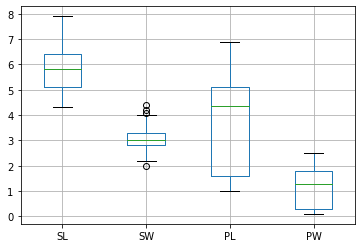

In [15]:
data[['SL', 'SW', 'PL', 'PW']].boxplot()
plt.show()

In [16]:
#handling outliers

<AxesSubplot:>

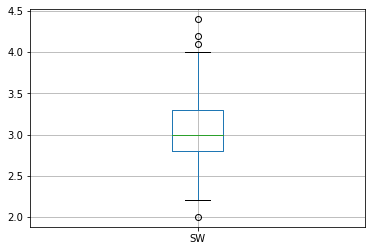

In [17]:
data[['SW']].boxplot()

In [18]:
#calculating interquartile range(IQR)
q1=np.percentile(data['SW'],25,interpolation='midpoint')
q2=np.percentile(data['SW'],50,interpolation='midpoint')
q3=np.percentile(data['SW'],75,interpolation='midpoint')
IQR=q3-q1

low_lim=q1-(1.5*IQR)
up_lim=q3+(1.5*IQR)
print('Lower limit : ',low_lim)
print('Upper limit : ',up_lim)

Lower limit :  2.05
Upper limit :  4.05


In [19]:
outlier=[]
for x in data['SW']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [20]:
out_idx=data['SW']<low_lim
data.loc[out_idx].index

Int64Index([60], dtype='int64')

In [21]:
out_idx=data['SW']>up_lim
data.loc[out_idx].index

Int64Index([15, 32, 33], dtype='int64')

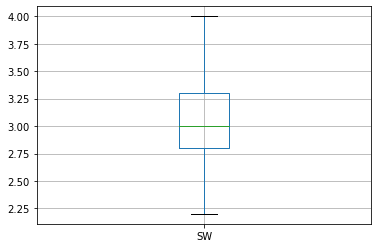

In [22]:
data.drop([15, 32, 33,60],inplace=True)
data[['SW']].boxplot()
plt.show()

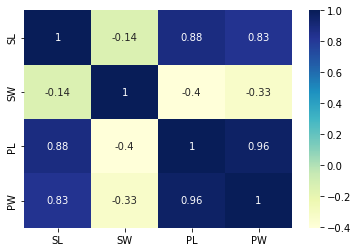

In [23]:
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.show()

it is seen that even after handling outliers in SW,it has very low correlation compared to other three so we can drop that column

In [24]:
#label encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.0,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Feature Selection

In [26]:
#split dataset in features and target variable
X = data.drop(['Classification','SW'],axis=1) # Features
y= data['Classification'] # Target variable

### Splitting Data

In [27]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [28]:
#standardizing

In [29]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test =scaler.fit_transform(X_test)

### Evaluating Model

### Logistic regression

In [30]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [31]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(X_train, y_train) 
y_pred=logit_model.predict(X_test)

In [32]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ",precision_score(y_test,y_pred,pos_label='positive',average='micro'))
print("Recall is: ",recall_score(y_test,y_pred,pos_label='positive',average='micro'))
print("f1 score is: ",f1_score(y_test,y_pred,pos_label='positive',average='micro'))

Accuracy is:  0.9
Precision is:  0.9
Recall is:  0.9
f1 score is:  0.9


### Decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ",precision_score(y_test,y_pred,pos_label='positive',average='micro'))
print("Recall is: ",recall_score(y_test,y_pred,pos_label='positive',average='micro'))
print("f1 score is: ",f1_score(y_test,y_pred,pos_label='positive',average='micro'))

Accuracy is:  0.9333333333333333
Precision is:  0.9333333333333333
Recall is:  0.9333333333333333
f1 score is:  0.9333333333333333


### kNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [35]:
acc_values

[0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9]

Text(0, 0.5, 'accuracy')

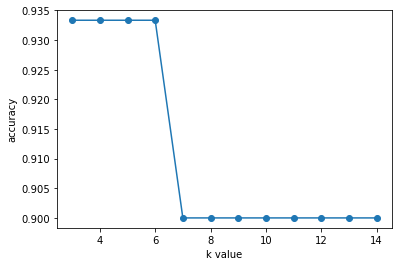

In [36]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [37]:
#giving k value as 6
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ",precision_score(y_test,y_pred,pos_label='positive',average='micro'))
print("Recall is: ",recall_score(y_test,y_pred,pos_label='positive',average='micro'))
print("f1 score is: ",f1_score(y_test,y_pred,pos_label='positive',average='micro'))

Accuracy is:  0.9
Precision is:  0.9
Recall is:  0.9
f1 score is:  0.9


### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [40]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ",precision_score(y_test,y_pred,pos_label='positive',average='micro'))
print("Recall is: ",recall_score(y_test,y_pred,pos_label='positive',average='micro'))
print("f1 score is: ",f1_score(y_test,y_pred,pos_label='positive',average='micro'))

Accuracy is:  0.9333333333333333
Precision is:  0.9333333333333333
Recall is:  0.9333333333333333
f1 score is:  0.9333333333333333


### SVC

In [41]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ",precision_score(y_test,y_pred,pos_label='positive',average='micro'))
print("Recall is: ",recall_score(y_test,y_pred,pos_label='positive',average='micro'))
print("f1 score is: ",f1_score(y_test,y_pred,pos_label='positive',average='micro'))


Accuracy is:  0.9
Precision is:  0.9
Recall is:  0.9
f1 score is:  0.9


out of these models decision tree and random forest gives the higher result.since random forest algorithm provides a higher level of accuracy in predicting outcomes over the decision tree algorithm choosing it will be best.